### Two Intervals at Small x Expansion (Second Order in x)

Note that in this case we can also fix $x$ while varying $\alpha$.

Note that this is an independent model. The general formula provided is not a free boson, multiplicity is not 2 (here we just set 1).

Fix $\Delta =0.6$, $\epsilon^2=0.1$.

$x=0.001 \to 0.5$ with $\delta x=0.00005$

In [ ]:
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>") 
# to restart the kernel, prevent from reusing any trained models

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
%matplotlib inline

from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt

df = pd.read_csv('Data_Two_Interval_Secondx.csv', encoding='utf-8', encoding_errors='ignore')
df

,Correct Entropy,Approx Entropy,1,2,3,4,5,6,7,8,...,41,42,43,44,45,46,47,48,49,50
0,0.223966,0.221028,0.154627,0.025545,0.010768,0.006345,0.004252,0.003059,0.002309,0.001807,...,0.000082,0.000078,0.000075,0.000071,0.000068,0.000065,0.000063,0.000060,0.000058,0.000056
1,0.240212,0.236998,0.164865,0.027834,0.011681,0.006867,0.004601,0.003312,0.002501,0.001958,...,0.000089,0.000085,0.000081,0.000078,0.000074,0.000071,0.000068,0.000066,0.000063,0.000061
2,0.255701,0.252215,0.174510,0.030061,0.012570,0.007374,0.004940,0.003557,0.002688,0.002105,...,0.000096,0.000092,0.000088,0.000084,0.000080,0.000077,0.000074,0.000071,0.000068,0.000066
3,0.270501,0.266746,0.183622,0.032225,0.013435,0.007866,0.005269,0.003795,0.002868,0.002247,...,0.000103,0.000099,0.000094,0.000090,0.000086,0.000083,0.000079,0.000076,0.000073,0.000071
4,0.284670,0.280651,0.192252,0.034331,0.014279,0.008344,0.005588,0.004026,0.003044,0.002385,...,0.000110,0.000105,0.000101,0.000096,0.000092,0.000088,0.000085,0.000081,0.000078,0.000075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.032296,1.901332,0.783084,0.316015,0.175027,0.111979,0.078212,0.058036,0.045024,0.036135,...,0.002516,0.002418,0.002326,0.002239,0.002158,0.002081,0.002008,0.001939,0.001874,0.001813
9996,2.032291,1.901328,0.783083,0.316014,0.175026,0.111978,0.078211,0.058036,0.045024,0.036135,...,0.002516,0.002418,0.002326,0.002239,0.002158,0.002081,0.002008,0.001939,0.001874,0.001813
9997,2.032286,1.901324,0.783083,0.316014,0.175026,0.111978,0.078211,0.058036,0.045024,0.036135,...,0.002516,0.002418,0.002326,0.002239,0.002158,0.002081,0.002008,0.001939,0.001874,0.001812
9998,2.032282,1.901320,0.783082,0.316013,0.175026,0.111978,0.078211,0.058035,0.045024,0.036134,...,0.002516,0.002418,0.002326,0.002239,0.002158,0.002081,0.002008,0.001939,0.001874,0.001812


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\zxpet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


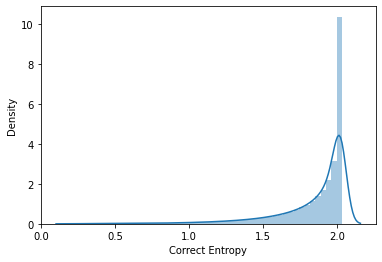

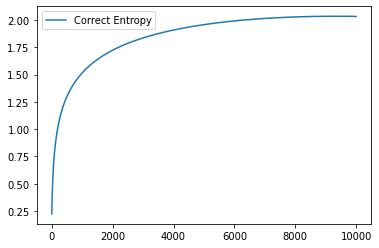

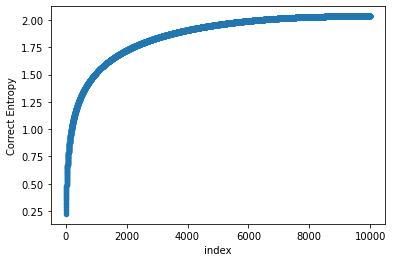

In [2]:
# Here we should check the data
# If there are problems with data (e.g. extreme values, weired distribution), use Scaler in the next block

print(sns.distplot(df['Correct Entropy']))
# Safe to ignore warnings

print(df.plot(y='Correct Entropy', use_index=True))

print(df.reset_index().plot.scatter(x='index',y='Correct Entropy'))

In [3]:
df1 = df.drop(['Correct Entropy','Approx Entropy'], axis = 1)

# do the splitting twice for to separate the data points to train-validation-test sets, we do 80-10-10%.

X = df1
y = df['Correct Entropy']
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.1, random_state = 42)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=1.0/9, random_state=42) 
# 1.0/9 x 0.9 = 0.1

def build_model(hp):
    units = hp.Int(name="units", min_value=16, max_value=64, step=16)
    # sample hyperparameter values from hp object. After sampling, these values (such as "units" variables here) 
    # are just regular Python constants.
    model = keras.Sequential([
        layers.Dense(units, activation="relu"),
        layers.Dense(1)
    ])
    optimizer = hp.Choice(name="optimizer", values=["rmsprop", "adam"])
    # different kinds of hyperparameters are available: Int, Float, Boolean, Choice, Fixed
    model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])
    return model 
    # the function returns a compiled model
    
# note we can also use hp.xxx to tune layers, activation functions etc.

tuner = kt.BayesianOptimization(build_model, # specify the model-building fun (or hypermodel instance)
                                objective="val_loss", 
                                # specify the metric that the tuner will seek to optimize, always specify validation metrics,
                                # since the goal of the search process is to find models that generalize
                                max_trials=10, # max number of different model configurations ("trials")
                                executions_per_trial=2, 
                                # To reduce metrics variance, you can train the same model multiple times and 
                                # average the results. This is how many training rounds (executions) to run for each trial. 
                                directory="SmallxSecondTest", # where to store search logs
                                overwrite=True, 
                                #whether to overwrite data in directory to start a new search. 
                                # Set this to True if you have modified the model-building fun, or to False to resume 
                                # a previously started search with the same model-building fun.
                                ) 

callbacks = [keras.callbacks.EarlyStopping(monitor="val_loss", patience=5),] 
# patience=x: interrupts training when monitor has stopped improving for x epochs

tuner.search(x = X_train, y = y_train, batch_size=128, epochs=50, validation_data=(X_val, y_val), callbacks=callbacks, verbose=2,)
# this takes the same arguments as fit() (it simply passes them down to fit() for each new model)

# here use a large number of epochs (you don't know in advance how many epochs each model will need), and use an EarlyStopping
# callback to stop training when you start overfitting.

# print(tuner.search_space_summary())

Trial 10 Complete [00h 00m 03s]
val_loss: 2.026096080953721e-05

Best val_loss So Far: 1.5215751318464754e-05
Total elapsed time: 00h 00m 38s
INFO:tensorflow:Oracle triggered exit


In [4]:
# query the best hyperparameter configurations, can then be used to retrain
# we can then pass to the model-building function

top_n = 4 # query the best 4
best_hps = tuner.get_best_hyperparameters(top_n) 
best_hps # returns a list

In [5]:
# Build the model with the best hp and retrain the model by itself "with the entire dataset"
# We will need to increase slightly the epochs as we are training on the entire dataset.

model = build_model(best_hps[0])
model.fit(X_train_full, y_train_full, epochs=60)

Epoch 1/60
282/282 [==============================] - 0s 447us/step - loss: 1.5852 - mae: 1.1631
Epoch 2/60
282/282 [==============================] - 0s 437us/step - loss: 0.0191 - mae: 0.0975
Epoch 3/60
282/282 [==============================] - 0s 437us/step - loss: 0.0041 - mae: 0.0429
Epoch 4/60
282/282 [==============================] - 0s 433us/step - loss: 4.5070e-04 - mae: 0.0126
Epoch 5/60
282/282 [==============================] - 0s 437us/step - loss: 3.4042e-05 - mae: 0.0046
Epoch 6/60
282/282 [==============================] - 0s 440us/step - loss: 2.8518e-05 - mae: 0.0046
Epoch 7/60
282/282 [==============================] - 0s 449us/step - loss: 2.7675e-05 - mae: 0.0046
Epoch 8/60
282/282 [==============================] - 0s 458us/step - loss: 2.7207e-05 - mae: 0.0045
Epoch 9/60
282/282 [==============================] - 0s 440us/step - loss: 2.6898e-05 - mae: 0.0045
Epoch 10/60
282/282 [==============================] - 0s 440us/step - loss: 2.6379e-05 - mae: 0.0043
E

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                816       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


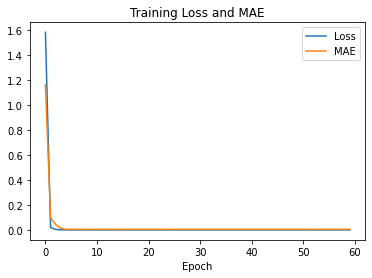

     Correct Entropy  Model Predictions
0           1.997747           1.994985
1           1.943323           1.941135
2           1.681152           1.679626
3           1.945952           1.943740
4           1.935628           1.933509
..               ...                ...
995         1.902965           1.901101
996         2.007714           2.004833
997         1.851898           1.850320
998         1.714542           1.713101
999         2.024449           2.021368

[1000 rows x 2 columns]
AxesSubplot(0.125,0.125;0.775x0.755)


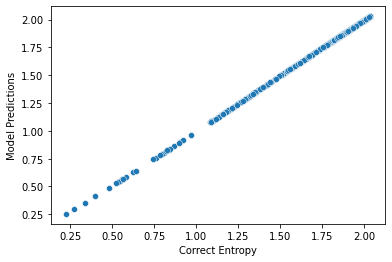

In [7]:
plt.plot(model.history.history["loss"], label="Loss")
plt.plot(model.history.history["mae"], label="MAE")
plt.title("Training Loss and MAE")
plt.xlabel("Epoch")
plt.legend()
plt.show()

# note that we don't need to plot the val_loss as we are training on the full dataset except test data

test_predictions = model.predict(X_test)
test_pred = pd.DataFrame(test_predictions)
test_pred.columns = ['Model Predictions']

pred_df = pd.DataFrame(y_test)
pred_df_reset_index = pred_df.reset_index(drop=True)

df_compare = pd.concat([pred_df_reset_index, test_pred], axis = 1)
print(df_compare)

print(sns.scatterplot(x='Correct Entropy', y='Model Predictions', data=df_compare))

In [8]:
# compute percent relative error (=(|absolute error|/true value)*100%)

# extract the X_test and then sum each row to get the approximate entropy
df_approx = pd.DataFrame(X_test)
df_approx_reset_index = df_approx.reset_index(drop=True)
df_approx1 = df_approx_reset_index.sum(axis = 1)
df_approx1 = pd.DataFrame(df_approx1)
df_approx1.columns = ['Approximate Entropy']


df_compare1 = pd.concat([df_compare, df_approx1], axis = 1)
print(df_compare1)


# absolute error for model predictions and approximate entropy

df_abs_error1 = abs(df_compare1['Correct Entropy']-df_compare1['Model Predictions'])
df_abs_error2 = abs(df_compare1['Correct Entropy']-df_compare1['Approximate Entropy'])
df_abs_error = pd.concat([df_abs_error1, df_abs_error2], axis = 1)
df_abs_error.columns = ['Abs Error for Model', 'Abs Error for Approx']
print(df_abs_error)

# percent relative error for model predictions and approximate entropy

df_rel_error1 = (abs(df_compare1['Correct Entropy']-df_compare1['Model Predictions'])/df_compare1['Correct Entropy'])*100
df_rel_error2 = (abs(df_compare1['Correct Entropy']-df_compare1['Approximate Entropy'])/df_compare1['Correct Entropy'])*100
df_rel_error = pd.concat([df_rel_error1, df_rel_error2], axis = 1)
df_rel_error.columns = ['Rel Error for Model', 'Rel Error for Approx']
print(df_rel_error)

     Correct Entropy  Model Predictions  Approximate Entropy
0           1.997747           1.994985             1.871585
1           1.943323           1.941135             1.824819
2           1.681152           1.679626             1.595504
3           1.945952           1.943740             1.827084
4           1.935628           1.933509             1.818186
..               ...                ...                  ...
995         1.902965           1.901101             1.789965
996         2.007714           2.004833             1.880126
997         1.851898           1.850320             1.745633
998         1.714542           1.713101             1.625089
999         2.024449           2.021368             1.894469

[1000 rows x 3 columns]
     Abs Error for Model  Abs Error for Approx
0               0.002762              0.126162
1               0.002188              0.118504
2               0.001526              0.085648
3               0.002212              0.118868
4       

In [9]:
best_models = tuner.get_best_models(top_n)
best_models

In [10]:
model = best_models[2] 
model.fit(X_train_full, y_train_full, epochs=10)

Epoch 1/10
282/282 [==============================] - 0s 461us/step - loss: 2.7077e-05 - mae: 0.0046
Epoch 2/10
282/282 [==============================] - 0s 456us/step - loss: 2.6030e-05 - mae: 0.0043
Epoch 3/10
282/282 [==============================] - 0s 458us/step - loss: 2.5723e-05 - mae: 0.0044
Epoch 4/10
282/282 [==============================] - 0s 486us/step - loss: 2.6200e-05 - mae: 0.0047
Epoch 5/10
282/282 [==============================] - 0s 461us/step - loss: 2.5711e-05 - mae: 0.0047
Epoch 6/10
282/282 [==============================] - 0s 472us/step - loss: 2.5208e-05 - mae: 0.0046
Epoch 7/10
282/282 [==============================] - 0s 465us/step - loss: 2.5333e-05 - mae: 0.0046
Epoch 8/10
282/282 [==============================] - 0s 500us/step - loss: 2.4747e-05 - mae: 0.0047
Epoch 9/10
282/282 [==============================] - 0s 469us/step - loss: 2.4746e-05 - mae: 0.0047
Epoch 10/10
282/282 [==============================] - 0s 465us/step - loss: 2.4495e-05 - m

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                816       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


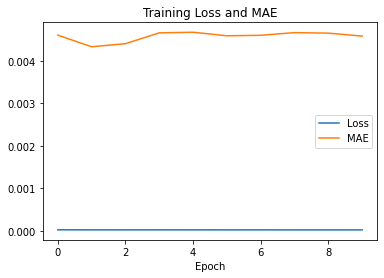

     Correct Entropy  Model Predictions
0           1.997747           2.001116
1           1.943323           1.947392
2           1.681152           1.686647
3           1.945952           1.949990
4           1.935628           1.939784
..               ...                ...
995         1.902965           1.907460
996         2.007714           2.010940
997         1.851898           1.856819
998         1.714542           1.720020
999         2.024449           2.027432

[1000 rows x 2 columns]
AxesSubplot(0.125,0.125;0.775x0.755)


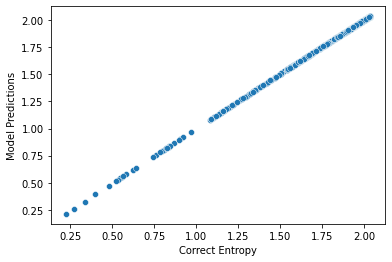

In [12]:
plt.plot(model.history.history["loss"], label="Loss")
plt.plot(model.history.history["mae"], label="MAE")
plt.title("Training Loss and MAE")
plt.xlabel("Epoch")
plt.legend()
plt.show()

# note that we don't need to plot the val_loss as we are training on the full dataset except test data

test_predictions = model.predict(X_test)
test_pred = pd.DataFrame(test_predictions)
test_pred.columns = ['Model Predictions']

pred_df = pd.DataFrame(y_test)
pred_df_reset_index = pred_df.reset_index(drop=True)

df_compare = pd.concat([pred_df_reset_index, test_pred], axis = 1)
print(df_compare)

print(sns.scatterplot(x='Correct Entropy', y='Model Predictions', data=df_compare))

In [13]:
# compute percent relative error (=(|absolute error|/true value)*100%)

# extract the X_test and then sum each row to get the approximate entropy
df_approx = pd.DataFrame(X_test)
df_approx_reset_index = df_approx.reset_index(drop=True)
df_approx1 = df_approx_reset_index.sum(axis = 1)
df_approx1 = pd.DataFrame(df_approx1)
df_approx1.columns = ['Approximate Entropy']


df_compare1 = pd.concat([df_compare, df_approx1], axis = 1)
print(df_compare1)


# absolute error for model predictions and approximate entropy

df_abs_error1 = abs(df_compare1['Correct Entropy']-df_compare1['Model Predictions'])
df_abs_error2 = abs(df_compare1['Correct Entropy']-df_compare1['Approximate Entropy'])
df_abs_error = pd.concat([df_abs_error1, df_abs_error2], axis = 1)
df_abs_error.columns = ['Abs Error for Model', 'Abs Error for Approx']
print(df_abs_error)

# percent relative error for model predictions and approximate entropy

df_rel_error1 = (abs(df_compare1['Correct Entropy']-df_compare1['Model Predictions'])/df_compare1['Correct Entropy'])*100
df_rel_error2 = (abs(df_compare1['Correct Entropy']-df_compare1['Approximate Entropy'])/df_compare1['Correct Entropy'])*100
df_rel_error = pd.concat([df_rel_error1, df_rel_error2], axis = 1)
df_rel_error.columns = ['Rel Error for Model', 'Rel Error for Approx']
print(df_rel_error)

     Correct Entropy  Model Predictions  Approximate Entropy
0           1.997747           2.001116             1.871585
1           1.943323           1.947392             1.824819
2           1.681152           1.686647             1.595504
3           1.945952           1.949990             1.827084
4           1.935628           1.939784             1.818186
..               ...                ...                  ...
995         1.902965           1.907460             1.789965
996         2.007714           2.010940             1.880126
997         1.851898           1.856819             1.745633
998         1.714542           1.720020             1.625089
999         2.024449           2.027432             1.894469

[1000 rows x 3 columns]
     Abs Error for Model  Abs Error for Approx
0               0.003368              0.126162
1               0.004069              0.118504
2               0.005496              0.085648
3               0.004038              0.118868
4       

### Reduce the dimensions of data (keep only k=10).

In [ ]:
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>") 
# to restart the kernel, prevent from reusing any trained models

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
%matplotlib inline

from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt

df = pd.read_csv('Data_Two_Interval_Secondx.csv', encoding='utf-8', encoding_errors='ignore')

df1 = df.drop(['Correct Entropy','Approx Entropy'], axis = 1)

df2 = df1.iloc[range(0,10000),range(0,10)]
df2

# note that in the end we need to re-compute the approximate entropy by summing each row

,1,2,3,4,5,6,7,8,9,10
0,0.154627,0.025545,0.010768,0.006345,0.004252,0.003059,0.002309,0.001807,0.001453,0.001195
1,0.164865,0.027834,0.011681,0.006867,0.004601,0.003312,0.002501,0.001958,0.001575,0.001296
2,0.174510,0.030061,0.012570,0.007374,0.004940,0.003557,0.002688,0.002105,0.001694,0.001393
3,0.183622,0.032225,0.013435,0.007866,0.005269,0.003795,0.002868,0.002247,0.001809,0.001489
4,0.192252,0.034331,0.014279,0.008344,0.005588,0.004026,0.003044,0.002385,0.001921,0.001581
...,...,...,...,...,...,...,...,...,...,...
9995,0.783084,0.316015,0.175027,0.111979,0.078212,0.058036,0.045024,0.036135,0.029779,0.025063
9996,0.783083,0.316014,0.175026,0.111978,0.078211,0.058036,0.045024,0.036135,0.029779,0.025063
9997,0.783083,0.316014,0.175026,0.111978,0.078211,0.058036,0.045024,0.036135,0.029778,0.025063
9998,0.783082,0.316013,0.175026,0.111978,0.078211,0.058035,0.045024,0.036134,0.029778,0.025063


In [2]:
X = df2
y = df['Correct Entropy']
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.1, random_state = 42)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=1.0/9, random_state=42) 
# 1.0/9 x 0.9 = 0.1

def build_model(hp):
    units = hp.Int(name="units", min_value=16, max_value=64, step=16)
    # sample hyperparameter values from hp object. After sampling, these values (such as "units" variables here) 
    # are just regular Python constants.
    model = keras.Sequential([
        layers.Dense(units, activation="relu"),
        layers.Dense(1)
    ])
    optimizer = hp.Choice(name="optimizer", values=["rmsprop", "adam"])
    # different kinds of hyperparameters are available: Int, Float, Boolean, Choice, Fixed
    model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])
    return model 
    # the function returns a compiled model
    
# note we can also use hp.xxx to tune layers, activation functions etc.

tuner = kt.BayesianOptimization(build_model, # specify the model-building fun (or hypermodel instance)
                                objective="val_loss", 
                                # specify the metric that the tuner will seek to optimize, always specify validation metrics,
                                # since the goal of the search process is to find models that generalize
                                max_trials=10, # max number of different model configurations ("trials")
                                executions_per_trial=2, 
                                # To reduce metrics variance, you can train the same model multiple times and 
                                # average the results. This is how many training rounds (executions) to run for each trial. 
                                directory="SmallxSecondTest", # where to store search logs
                                overwrite=True, 
                                #whether to overwrite data in directory to start a new search. 
                                # Set this to True if you have modified the model-building fun, or to False to resume 
                                # a previously started search with the same model-building fun.
                                ) 

callbacks = [keras.callbacks.EarlyStopping(monitor="val_loss", patience=5),] 
# patience=x: interrupts training when monitor has stopped improving for x epochs

tuner.search(x = X_train, y = y_train, batch_size=128, epochs=50, validation_data=(X_val, y_val), callbacks=callbacks, verbose=2,)
# this takes the same arguments as fit() (it simply passes them down to fit() for each new model)

# here use a large number of epochs (you don't know in advance how many epochs each model will need), and use an EarlyStopping
# callback to stop training when you start overfitting.

# print(tuner.search_space_summary())

Trial 10 Complete [00h 00m 02s]
val_loss: 8.752595749683678e-05

Best val_loss So Far: 8.752595749683678e-05
Total elapsed time: 00h 00m 36s
INFO:tensorflow:Oracle triggered exit


In [3]:
tuner.results_summary()

Results summary
Results in SmallxSecondTest\untitled_project
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
units: 48
optimizer: rmsprop
Score: 8.752595749683678e-05
Trial summary
Hyperparameters:
units: 48
optimizer: rmsprop
Score: 0.00010074306192109361
Trial summary
Hyperparameters:
units: 64
optimizer: adam
Score: 0.00010487668623682112
Trial summary
Hyperparameters:
units: 48
optimizer: rmsprop
Score: 0.00010778662181110121
Trial summary
Hyperparameters:
units: 48
optimizer: rmsprop
Score: 0.00011745007213903591
Trial summary
Hyperparameters:
units: 64
optimizer: rmsprop
Score: 0.00011915229697478935
Trial summary
Hyperparameters:
units: 48
optimizer: rmsprop
Score: 0.0001228667279065121
Trial summary
Hyperparameters:
units: 48
optimizer: rmsprop
Score: 0.00012659059575526044
Trial summary
Hyperparameters:
units: 48
optimizer: rmsprop
Score: 0.0001715319958748296
Trial summary
Hyperparameters:
units: 16
optimizer: adam
Score: 0.00

In [4]:
# query the best hyperparameter configurations, can then be used to retrain
# we can then pass to the model-building function

top_n = 4 # query the best 4
best_hps = tuner.get_best_hyperparameters(top_n) 
best_hps # returns a list

In [5]:
# Build the model with the best hp and retrain the model by itself "with the entire dataset"
# We will need to increase slightly the epochs as we are training on the entire dataset.

model = build_model(best_hps[0])
model.fit(X_train_full, y_train_full, epochs=60)

Epoch 1/60
282/282 [==============================] - 0s 444us/step - loss: 0.4608 - mae: 0.4206
Epoch 2/60
282/282 [==============================] - 0s 444us/step - loss: 0.0034 - mae: 0.0418
Epoch 3/60
282/282 [==============================] - 0s 437us/step - loss: 3.1969e-04 - mae: 0.0141
Epoch 4/60
282/282 [==============================] - 0s 437us/step - loss: 2.1526e-04 - mae: 0.0112
Epoch 5/60
282/282 [==============================] - 0s 444us/step - loss: 2.0304e-04 - mae: 0.0107
Epoch 6/60
282/282 [==============================] - 0s 437us/step - loss: 1.9635e-04 - mae: 0.0108
Epoch 7/60
282/282 [==============================] - 0s 447us/step - loss: 1.9038e-04 - mae: 0.0107
Epoch 8/60
282/282 [==============================] - 0s 440us/step - loss: 1.8061e-04 - mae: 0.0105
Epoch 9/60
282/282 [==============================] - 0s 461us/step - loss: 1.7428e-04 - mae: 0.0103
Epoch 10/60
282/282 [==============================] - 0s 479us/step - loss: 1.7038e-04 - mae: 0.01

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 48)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 49        
                                                                 
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


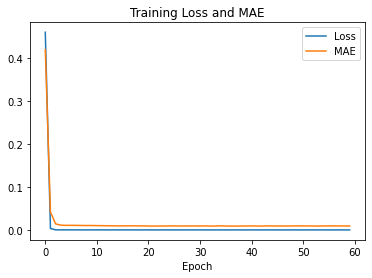

     Correct Entropy  Model Predictions
0           1.997747           1.981248
1           1.943323           1.928451
2           1.681152           1.669878
3           1.945952           1.931007
4           1.935628           1.920965
..               ...                ...
995         1.902965           1.889115
996         2.007714           1.990899
997         1.851898           1.839088
998         1.714542           1.703181
999         2.024449           2.007132

[1000 rows x 2 columns]
AxesSubplot(0.125,0.125;0.775x0.755)


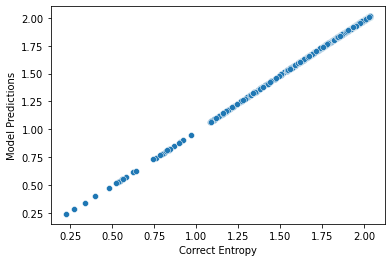

In [7]:
plt.plot(model.history.history["loss"], label="Loss")
plt.plot(model.history.history["mae"], label="MAE")
plt.title("Training Loss and MAE")
plt.xlabel("Epoch")
plt.legend()
plt.show()

# note that we don't need to plot the val_loss as we are training on the full dataset except test data

test_predictions = model.predict(X_test)
test_pred = pd.DataFrame(test_predictions)
test_pred.columns = ['Model Predictions']

pred_df = pd.DataFrame(y_test)
pred_df_reset_index = pred_df.reset_index(drop=True)

df_compare = pd.concat([pred_df_reset_index, test_pred], axis = 1)
print(df_compare)

print(sns.scatterplot(x='Correct Entropy', y='Model Predictions', data=df_compare))

In [8]:
# compute percent relative error (=(|absolute error|/true value)*100%)

# extract the X_test and then sum each row to get the approximate entropy
df_approx = pd.DataFrame(X_test)
df_approx_reset_index = df_approx.reset_index(drop=True)
df_approx1 = df_approx_reset_index.sum(axis = 1)
df_approx1 = pd.DataFrame(df_approx1)
df_approx1.columns = ['Approximate Entropy']


df_compare1 = pd.concat([df_compare, df_approx1], axis = 1)
print(df_compare1)


# absolute error for model predictions and approximate entropy

df_abs_error1 = abs(df_compare1['Correct Entropy']-df_compare1['Model Predictions'])
df_abs_error2 = abs(df_compare1['Correct Entropy']-df_compare1['Approximate Entropy'])
df_abs_error = pd.concat([df_abs_error1, df_abs_error2], axis = 1)
df_abs_error.columns = ['Abs Error for Model', 'Abs Error for Approx']
print(df_abs_error)

# percent relative error for model predictions and approximate entropy

df_rel_error1 = (abs(df_compare1['Correct Entropy']-df_compare1['Model Predictions'])/df_compare1['Correct Entropy'])*100
df_rel_error2 = (abs(df_compare1['Correct Entropy']-df_compare1['Approximate Entropy'])/df_compare1['Correct Entropy'])*100
df_rel_error = pd.concat([df_rel_error1, df_rel_error2], axis = 1)
df_rel_error.columns = ['Rel Error for Model', 'Rel Error for Approx']
print(df_rel_error)

     Correct Entropy  Model Predictions  Approximate Entropy
0           1.997747           1.981248             1.635485
1           1.943323           1.928451             1.599875
2           1.681152           1.669878             1.420967
3           1.945952           1.931007             1.601605
4           1.935628           1.920965             1.594804
..               ...                ...                  ...
995         1.902965           1.889115             1.573165
996         2.007714           1.990899             1.641971
997         1.851898           1.839088             1.538947
998         1.714542           1.703181             1.444475
999         2.024449           2.007132             1.652881

[1000 rows x 3 columns]
     Abs Error for Model  Abs Error for Approx
0               0.016499              0.362262
1               0.014872              0.343448
2               0.011274              0.260184
3               0.014945              0.344347
4       